In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
df = pd.read_csv("dataset/house.csv")

In [67]:
df.head()

,location,Bed,Bath,Ft,price
0,Texas,4.0,2.5,1889.0,239000.0
1,Texas,3.0,1.0,1228.0,180000.0
2,Texas,2.0,1.0,1032.0,195000.0
3,Texas,3.0,2.0,2331.0,290000.0
4,Texas,4.0,2.0,1754.0,265000.0


In [68]:
df.shape

(2588, 5)

In [69]:
df = df = df.rename(columns={'Bed': 'bedroom', 'Bath': 'bathroom', 'Ft': 'square_ft'})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   2588 non-null   object 
 1   bedroom    2574 non-null   float64
 2   bathroom   2551 non-null   float64
 3   square_ft  2500 non-null   float64
 4   price      2588 non-null   float64
dtypes: float64(4), object(1)
memory usage: 101.2+ KB


In [71]:
df.isnull().sum()

location      0
bedroom      14
bathroom     37
square_ft    88
price         0
dtype: int64

In [72]:
df.dropna(inplace=True)

In [73]:
df.duplicated().sum()

np.int64(22)

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(2439, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2439 entries, 0 to 2587
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   2439 non-null   object 
 1   bedroom    2439 non-null   float64
 2   bathroom   2439 non-null   float64
 3   square_ft  2439 non-null   float64
 4   price      2439 non-null   float64
dtypes: float64(4), object(1)
memory usage: 114.3+ KB


In [77]:
df.describe()

,bedroom,bathroom,square_ft,price
count,2439.000000,2439.000000,2439.000000,2.439000e+03
mean,3.467405,2.425174,2055.924969,7.199954e+05
std,1.099847,1.137780,1262.052149,1.256238e+06
min,1.000000,0.500000,14.000000,2.499000e+04
25%,3.000000,2.000000,1312.000000,3.150000e+05
50%,3.000000,2.000000,1800.000000,4.880000e+05
75%,4.000000,3.000000,2421.000000,7.880000e+05
max,12.000000,13.000000,23824.000000,3.000000e+07


<Axes: xlabel='bedroom', ylabel='count'>

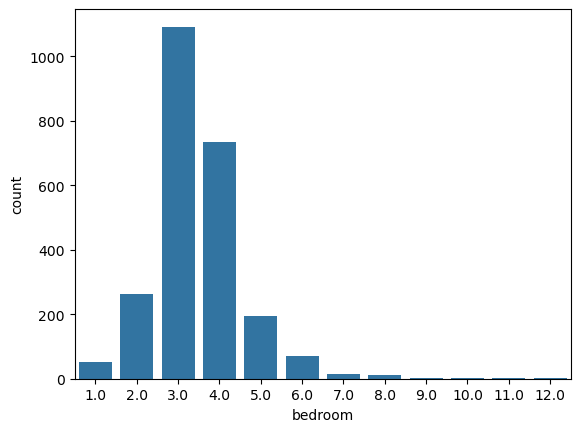

In [78]:
sns.countplot(x=df["bedroom"])

(array([1.80e+03, 5.71e+02, 4.60e+01, 1.30e+01, 5.00e+00, 3.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.4000e+01, 2.3950e+03, 4.7760e+03, 7.1570e+03, 9.5380e+03,
        1.1919e+04, 1.4300e+04, 1.6681e+04, 1.9062e+04, 2.1443e+04,
        2.3824e+04]),
 <BarContainer object of 10 artists>)

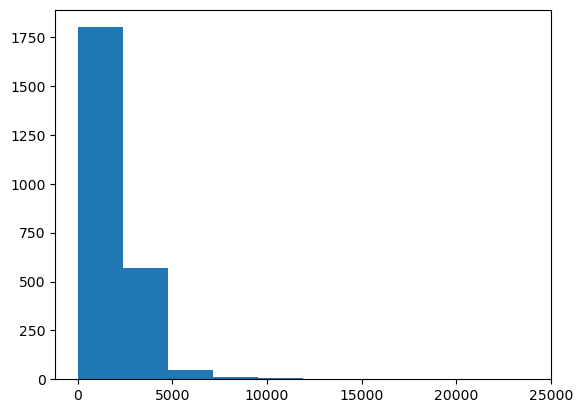

In [79]:
plt.hist(x=df["square_ft"])

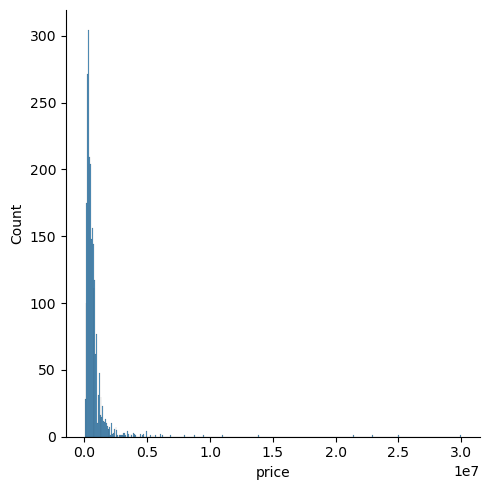

In [80]:
sns.displot(df["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7201862839d0>,
 'caps': [<matplotlib.lines.Line2D at 0x720186283c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x720186283890>],
 'medians': [<matplotlib.lines.Line2D at 0x720186283ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7201862e8050>],
 'means': []}

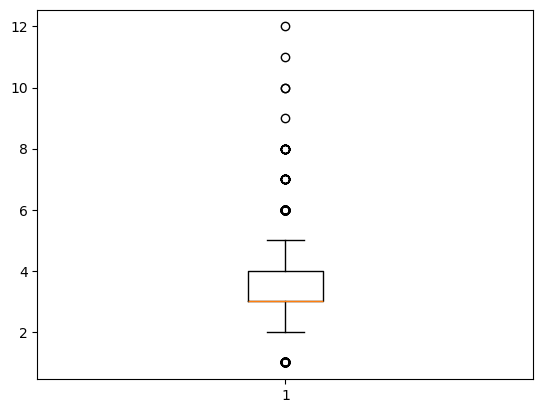

In [81]:
plt.boxplot(df["bedroom"])

{'whiskers': [<matplotlib.lines.Line2D at 0x720186316d50>,
 'caps': [<matplotlib.lines.Line2D at 0x720186316fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x720186316c10>],
 'medians': [<matplotlib.lines.Line2D at 0x720186317250>],
 'fliers': [<matplotlib.lines.Line2D at 0x720186317390>],
 'means': []}

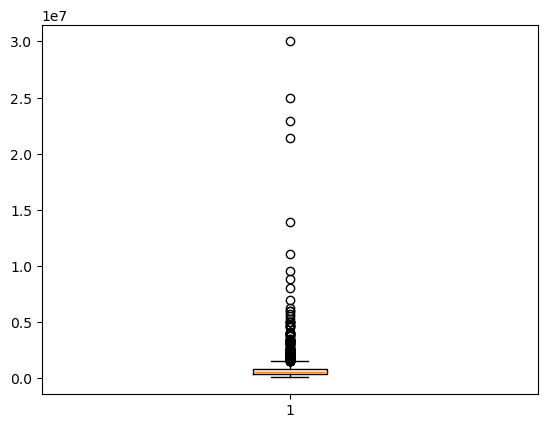

In [82]:
plt.boxplot(df["price"])

<Axes: xlabel='square_ft', ylabel='price'>

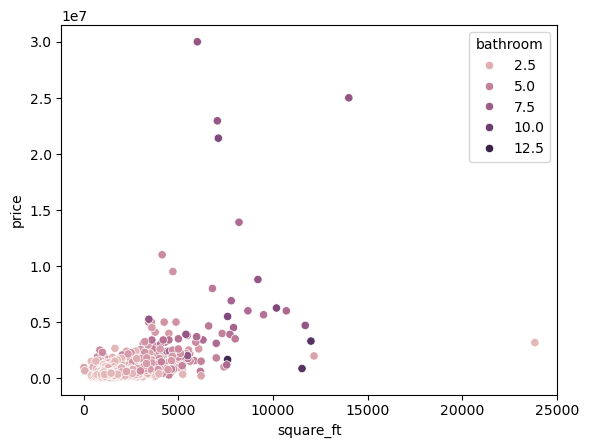

In [83]:
sns.scatterplot(x=df["square_ft"], y=df["price"], hue=df["bathroom"])

<Axes: ylabel='price'>

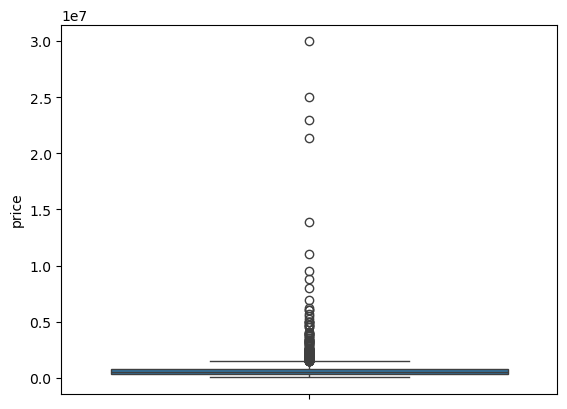

In [84]:
sns.boxplot(df["price"])

In [85]:
Q1 = df["bedroom"].quantile(0.25)
Q3 = df["bedroom"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["bedroom"] >= lower_bound) & (df["bedroom"] <= upper_bound)]

<Axes: ylabel='bedroom'>

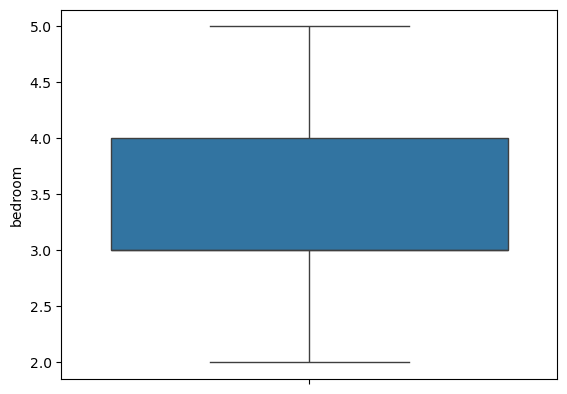

In [86]:
sns.boxplot(df["bedroom"])

In [87]:
Q1 = df["bathroom"].quantile(0.25)
Q3 = df["bathroom"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["bathroom"] >= lower_bound) & (df["bathroom"] <= upper_bound)]

<Axes: ylabel='bathroom'>

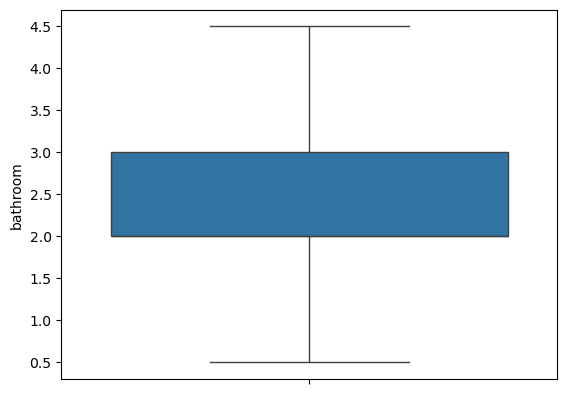

In [88]:
sns.boxplot(df["bathroom"])

In [89]:
Q1 = df["square_ft"].quantile(0.25)
Q3 = df["square_ft"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["square_ft"] >= lower_bound) & (df["square_ft"] <= upper_bound)]

<Axes: ylabel='square_ft'>

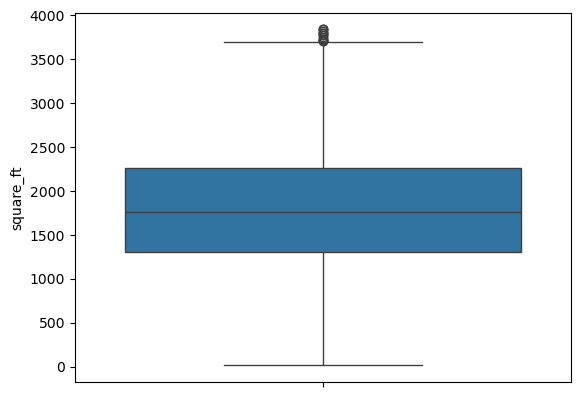

In [90]:
sns.boxplot(df["square_ft"])

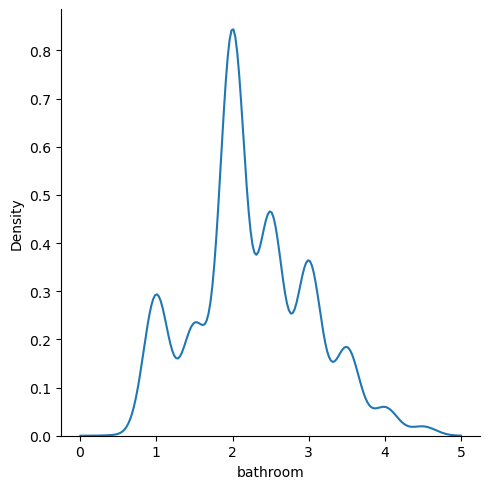

In [91]:
sns.displot(df["bathroom"],kind="kde")

In [92]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

<Axes: ylabel='price'>

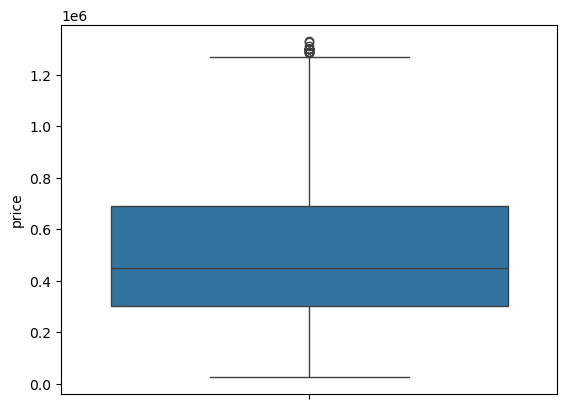

In [93]:
sns.boxplot(df["price"])

In [94]:
df["bedroom"] = np.log1p(df["bedroom"])

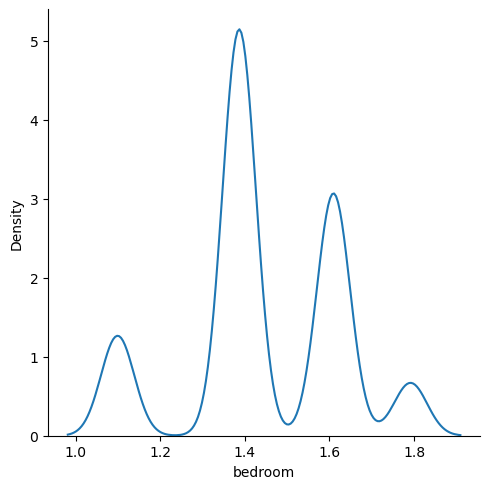

In [95]:
sns.displot(df["bedroom"],kind="kde")

In [96]:
df["bathroom"] = np.log1p(df["bathroom"])

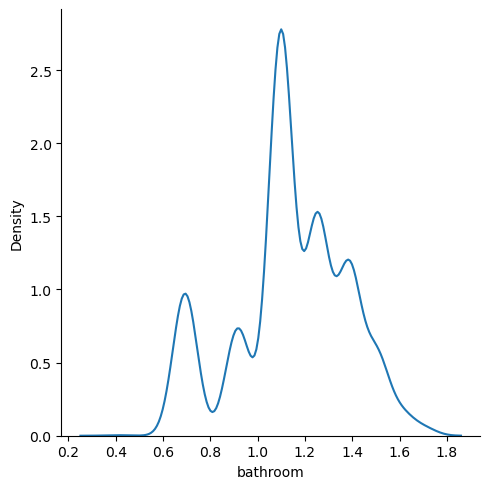

In [97]:
sns.displot(df["bathroom"],kind="kde")


In [98]:
one_hot = pd.get_dummies(df['location'], drop_first=True)
one_hot

,Chicago,New York,Texas
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
2582,True,False,False
2583,True,False,False
2585,True,False,False
2586,True,False,False


In [99]:
df = df.drop('location' ,axis = 1)

In [100]:
df.head()

,bedroom,bathroom,square_ft,price
0,1.609438,1.252763,1889.0,239000.0
1,1.386294,0.693147,1228.0,180000.0
2,1.098612,0.693147,1032.0,195000.0
3,1.386294,1.098612,2331.0,290000.0
4,1.609438,1.098612,1754.0,265000.0


In [101]:
df = df.join(one_hot)
df.head()

,bedroom,bathroom,square_ft,price,Chicago,New York,Texas
0,1.609438,1.252763,1889.0,239000.0,False,False,True
1,1.386294,0.693147,1228.0,180000.0,False,False,True
2,1.098612,0.693147,1032.0,195000.0,False,False,True
3,1.386294,1.098612,2331.0,290000.0,False,False,True
4,1.609438,1.098612,1754.0,265000.0,False,False,True


In [102]:
X = df.drop("price",axis=1)
y = df["price"]

In [103]:
X

,bedroom,bathroom,square_ft,Chicago,New York,Texas
0,1.609438,1.252763,1889.0,False,False,True
1,1.386294,0.693147,1228.0,False,False,True
2,1.098612,0.693147,1032.0,False,False,True
3,1.386294,1.098612,2331.0,False,False,True
4,1.609438,1.098612,1754.0,False,False,True
...,...,...,...,...,...,...
2582,1.386294,0.693147,1433.0,True,False,False
2583,1.386294,1.098612,1100.0,True,False,False
2585,1.791759,1.386294,2257.0,True,False,False
2586,1.386294,1.098612,1448.0,True,False,False


In [104]:
y

0       239000.0
1       180000.0
2       195000.0
3       290000.0
4       265000.0
          ...   
2582    319900.0
2583    325000.0
2585    585000.0
2586    445000.0
2587    639999.0
Name: price, Length: 2077, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train

,bedroom,bathroom,square_ft,Chicago,New York,Texas
591,1.098612,0.693147,1008.0,False,False,False
1566,1.386294,1.252763,1440.0,False,True,False
318,1.386294,1.098612,1604.0,False,False,True
463,1.386294,1.098612,1443.0,False,False,True
889,1.386294,1.252763,2327.0,False,False,False
...,...,...,...,...,...,...
2058,1.386294,1.386294,1683.0,True,False,False
1336,1.386294,1.386294,1050.0,False,True,False
1379,1.386294,0.916291,2283.0,False,True,False
1596,1.386294,1.098612,1548.0,False,True,False


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
reg = LinearRegression()

In [110]:
reg.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = reg.predict(X_test)

In [112]:
y_pred

array([ 203765.91047564,  719916.74751358,  118774.22716154,
        415865.86107667,  335363.48004764,  699899.74659002,
        818198.272609  ,  768557.78560697,  680612.53581451,
        289073.92841954,  247179.38543736,  892263.58617379,
        669642.39892643,  614608.84124792,  213002.26417694,
        258022.72913043,  313905.40132952,  844131.12636942,
        851092.13781589,  423711.41341119,  453110.58608695,
        280249.62998309,  306267.89726715,  497790.18384589,
        639356.42650648,  323964.92539479,  447572.34706525,
        271267.23091612,  774774.47397603,  333847.84120879,
        268559.66930533,  393364.44519381,  239904.73713695,
        373316.03139503,  428221.95233317,  426771.1789329 ,
        419702.79507631,  648839.95097205,  717082.89671407,
        395689.00635667,  108068.14098358,  471228.10782993,
        322441.43170977,  795679.22353838,  298292.92564568,
        763793.87276786,  397392.85154938,  246493.09786185,
        590776.08275422,

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2_score(y_test, y_pred)

0.6565388846158318

In [115]:
import pickle

In [116]:
with open('model.pkl', 'wb') as fp:
    pickle.dump(reg, fp)